<a href="https://colab.research.google.com/github/fvidalf/repo-colab/blob/main/tmdb_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os, sys, types
os.environ["DGL_IMPORT_GRAPHBOLT"] = "0"

for name in [
    "dgl.graphbolt",
    "dgl.graphbolt.base",
    "dgl.graphbolt.minibatch",
    "dgl.graphbolt.dataloader",
]:
    sys.modules[name] = types.ModuleType(name)

import dgl, torch
print("✅ DGL imported:", dgl.__version__, "Torch:", torch.__version__)


/home/felipe/iic3641-gml/repo/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


✅ DGL imported: 2.1.0+cu121 Torch: 2.3.0+cu121


In [3]:
import torch, dgl
print("Torch:", torch.__version__)
print("Torchdata:", __import__("torchdata").__version__)
print("DGL:", dgl.__version__)
print("CUDA available:", torch.cuda.is_available())
print("Backend:", dgl.backend.backend_name)

Torch: 2.3.0+cu121
Torchdata: 0.8.0+cpu
DGL: 2.1.0+cu121
CUDA available: True
Backend: pytorch


In [6]:
!chmod 600 ~/.config/kaggle/kaggle.json

In [7]:
!kaggle competitions download -c tmdb-box-office-prediction

  0%|                                               | 0.00/17.4M [00:00<?, ?B/s]
100%|███████████████████████████████████████| 17.4M/17.4M [00:00<00:00, 745MB/s]


In [1]:
!unzip tmdb-box-office-prediction.zip

Archive:  tmdb-box-office-prediction.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [4]:
import pandas as pd

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [5]:
print(train_df.columns)

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')


In [6]:
excluded_columms = ['id', 'imdb_id', 'tagline']
train_df.head(5).loc[:, ~train_df.columns.isin(excluded_columms)]

,belongs_to_collection,budget,genres,homepage,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,title,Keywords,cast,crew,revenue
0,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


### Normalización de dataset

Primero, dividimos el dataset en varias tablas, según las entidades identificadas

In [7]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Add a split indicator
train_df["split"] = "train"
test_df["split"] = "test"

# Ensure both have the same schema
for col in set(train_df.columns) - set(test_df.columns):
    test_df[col] = None

full_df = pd.concat([train_df, test_df], ignore_index=True)

In [8]:
import pandas as pd
import ast

# -----------------------------
# GLOBAL error log
# -----------------------------
errors = []

# -----------------------------
# Safe parsing
# -----------------------------
def safe_parse(cell, column_name, movie_id):
    if pd.isna(cell) or cell == "":
        return None
    try:
        return ast.literal_eval(cell)
    except Exception as e:
        errors.append({
            "movie_id": movie_id,
            "column": column_name,
            "error": str(e),
            "value": str(cell)[:300]
        })
        return None

# -----------------------------
# Generic normalization
# -----------------------------
def normalize_column(df, column_name, entity_id_field):
    """Normalize a column containing list/dict JSON-like data."""
    entity_rows, join_rows = [], []

    for movie_id, cell in zip(df.index, df[column_name]):
        parsed = safe_parse(cell, column_name, movie_id)
        if not parsed:
            continue
        if isinstance(parsed, dict):
            parsed = [parsed]

        for entry in parsed:
            entity_id = entry.get(entity_id_field)
            if entity_id is None:
                errors.append({
                    "movie_id": movie_id,
                    "column": column_name,
                    "error": f"Missing {entity_id_field}",
                    "value": str(entry)
                })
                continue

            entity_rows.append(entry)
            join_rows.append({"movie_id": movie_id, entity_id_field: entity_id})

    entity_df = pd.DataFrame(entity_rows).drop_duplicates(subset=[entity_id_field])
    join_df = pd.DataFrame(join_rows).drop_duplicates()
    return entity_df.reset_index(drop=True), join_df.reset_index(drop=True)

# -----------------------------
# Specialized normalization for cast/crew
# -----------------------------
def normalize_people(df, column_name, role_type):
    """Extract people (cast or crew) as separate entity + join tables."""
    person_rows, join_rows = [], []

    for movie_id, cell in zip(df.index, df[column_name]):
        parsed = safe_parse(cell, column_name, movie_id)
        if not parsed:
            continue

        for entry in parsed:
            pid = entry.get("id")
            if not pid:
                errors.append({
                    "movie_id": movie_id,
                    "column": column_name,
                    "error": "Missing person id",
                    "value": str(entry)
                })
                continue

            person_rows.append({
                "person_id": pid,
                "name": entry.get("name"),
                "gender": entry.get("gender"),
                "profile_path": entry.get("profile_path")
            })

            if role_type == "cast":
                join_rows.append({
                    "movie_id": movie_id,
                    "person_id": pid,
                    "character": entry.get("character"),
                    "order": entry.get("order"),
                    "credit_id": entry.get("credit_id"),
                    "cast_id": entry.get("cast_id")
                })
            else:
                join_rows.append({
                    "movie_id": movie_id,
                    "person_id": pid,
                    "department": entry.get("department"),
                    "job": entry.get("job"),
                    "credit_id": entry.get("credit_id")
                })

    people_df = pd.DataFrame(person_rows).drop_duplicates(subset=["person_id"])
    join_df = pd.DataFrame(join_rows).drop_duplicates()
    return people_df.reset_index(drop=True), join_df.reset_index(drop=True)



In [9]:
from collections import namedtuple

def normalize_dataframe(df):
    """Normalize a movie metadata dataframe into relational tables."""
    df = df.copy()
    df.rename(columns={"Keywords": "keywords"}, inplace=True)

    # --- Define normalization schema ---
    Column = namedtuple(
        "Column",
        ["name", "entity_id_field", "entity_df_name", "join_df_name", "is_people"]
    )

    columns_to_normalize = [
        Column("genres", "id", "genres", "movie_genres", False),
        Column("production_companies", "id", "companies", "movie_companies", False),
        Column("keywords", "id", "keywords", "movie_keywords", False),
        Column("belongs_to_collection", "id", "collections", "movie_collections", False),
        Column("cast", "id", "people", "movie_cast", True),
        Column("crew", "id", "people", "movie_crew", True),
        Column("production_countries", "iso_3166_1", "countries", "movie_countries", False),
        Column("spoken_languages", "iso_639_1", "languages", "movie_languages", False),
    ]

    final_dataframes = {}
    all_people = []

    # --- Normalize all relational / list-like columns ---
    for col in columns_to_normalize:
        print(f"Normalizing {col.name}...")
        if col.is_people:
            people_df, join_df = normalize_people(df, col.name, col.name)
            all_people.append(people_df)
            final_dataframes[col.join_df_name] = join_df
        else:
            entity_df, join_df = normalize_column(df, col.name, col.entity_id_field)
            entity_col = f"{col.entity_df_name[:-1]}_id"
            entity_df.rename(columns={col.entity_id_field: entity_col}, inplace=True)
            join_df.rename(columns={col.entity_id_field: entity_col}, inplace=True)
            final_dataframes[col.entity_df_name] = entity_df
            final_dataframes[col.join_df_name] = join_df

        # Drop the column from the base df after it’s processed
        if col.name in df.columns:
            df.drop(columns=[col.name], inplace=True)

    # --- Merge all people into a single unique table ---
    if all_people:
        people_df = pd.concat(all_people).drop_duplicates(subset=["person_id"])
        final_dataframes["people"] = people_df

    # --- Now the remaining df is our movies table ---
    movies_df = df.copy()

    # Rename ID column
    if "id" in movies_df.columns:
        movies_df.rename(columns={"id": "movie_id"}, inplace=True)

    # -- Process table by dropping and renaming columns ---
    cols_to_ignore = ["homepage", "poster_path"]
    movies_df.drop(columns=[c for c in cols_to_ignore if c in movies_df.columns], inplace=True, errors="ignore")

    movies_df.reset_index(drop=True, inplace=True)
    if "movie_id" in movies_df.columns:
        movies_df["movie_id"] = pd.to_numeric(movies_df["movie_id"], errors="coerce")

    final_dataframes["movies"] = movies_df

    # --- Wrap up ---
    print(f"✅ Normalization complete. {len(errors)} errors logged.")
    if errors:
        log_name = "normalization_errors.csv"
        pd.DataFrame(errors).to_csv(log_name, index=False)
        print(f"⚠️ Errors saved to {log_name}")

    return final_dataframes

In [93]:
full_dfs = normalize_dataframe(full_df)

Normalizing genres...
Normalizing production_companies...
Normalizing keywords...
Normalizing belongs_to_collection...
Normalizing cast...
Normalizing crew...
Normalizing production_countries...
Normalizing spoken_languages...
✅ Normalization complete. 0 errors logged.


In [94]:
print(full_dfs.keys())

dict_keys(['genres', 'movie_genres', 'companies', 'movie_companies', 'keywords', 'movie_keywords', 'collections', 'movie_collections', 'movie_cast', 'movie_crew', 'countries', 'movie_countries', 'languages', 'movie_languages', 'people', 'movies'])


In [95]:
def preview_final_dataframes(final_dataframes, n=10):
    """Prints the first n rows of each dataframe in final_dataframes."""
    for name, df in final_dataframes.items():
        print("=" * 80)
        print(f"📄 DataFrame: {name}  |  Shape: {df.shape}")
        print("-" * 80)
        # Show first n rows (truncate long values for clarity)
        with pd.option_context('display.max_columns', None,
                               'display.width', 1000,
                               'display.max_colwidth', 80):
            print(df.head(n))
        print("\n")

preview_final_dataframes(full_dfs)


📄 DataFrame: genres  |  Shape: (20, 2)
--------------------------------------------------------------------------------
   genre_id         name
0        35       Comedy
1        18        Drama
2     10751       Family
3     10749      Romance
4        53     Thriller
5        28       Action
6        16    Animation
7        12    Adventure
8        27       Horror
9        99  Documentary


📄 DataFrame: movie_genres  |  Shape: (18462, 2)
--------------------------------------------------------------------------------
   movie_id  genre_id
0         0        35
1         1        35
2         1        18
3         1     10751
4         1     10749
5         2        18
6         3        53
7         3        18
8         4        28
9         4        53


📄 DataFrame: companies  |  Shape: (7139, 2)
--------------------------------------------------------------------------------
                        name  companie_id
0         Paramount Pictures            4
1             United 

In [132]:
import pandas as pd

def analyze_crew_distribution(dfs):
    crew_df = dfs["movie_crew"].copy()

    # Count entries per department and per job
    dept_counts = (
        crew_df["department"]
        .value_counts()
        .rename_axis("department")
        .reset_index(name="num_entries")
    )

    job_counts = (
        crew_df["job"]
        .value_counts()
        .head(20)
        .rename_axis("job")
        .reset_index(name="num_entries")
    )

    print("🎬 Crew departments by frequency:")
    print(dept_counts.head(15).to_string(index=False))

    print("\n👷 Top 20 crew jobs:")
    print(job_counts.to_string(index=False))

    print(f"\nTotal unique departments: {crew_df['department'].nunique()}")
    print(f"Total unique jobs: {crew_df['job'].nunique()}")

analyze_crew_distribution(full_dfs)


🎬 Crew departments by frequency:
       department  num_entries
       Production        38927
            Sound        22497
              Art        19870
             Crew        17529
          Writing        16329
Costume & Make-Up        15223
           Camera        13229
        Directing        12245
          Editing        11135
   Visual Effects         9472
         Lighting         3129
           Actors            5

👷 Top 20 crew jobs:
                      job  num_entries
                 Producer        14670
       Executive Producer         8533
                 Director         8051
               Screenplay         7381
                   Editor         7054
                  Casting         6055
  Director of Photography         5611
  Original Music Composer         4768
            Art Direction         4637
        Production Design         4027
           Costume Design         3876
                   Writer         3870
           Set Decoration         32

In [133]:
def prune_crew_edges_smart(dfs,
                           keep_departments=None,
                           top_jobs_per_dept=5,
                           min_dept_edges=3000):
    crew_df = dfs["movie_crew"].copy()

    # auto-detect departments if not provided
    dept_counts = crew_df["department"].value_counts()
    if keep_departments is None:
        keep_departments = dept_counts[dept_counts >= min_dept_edges].index.tolist()

    kept_rows = []
    for dept in keep_departments:
        sub = crew_df[crew_df["department"] == dept]
        top_jobs = sub["job"].value_counts().head(top_jobs_per_dept).index
        sub = sub[sub["job"].isin(top_jobs)]
        kept_rows.append(sub)

    pruned = pd.concat(kept_rows, ignore_index=True)
    print(f"🎬 kept {len(pruned):,}/{len(crew_df):,} crew edges "
          f"→ {len(keep_departments)} departments × {top_jobs_per_dept} jobs each")
    dfs["movie_crew"] = pruned
    return dfs

full_dfs = prune_crew_edges_smart(full_dfs,keep_departments=None,top_jobs_per_dept=5,min_dept_edges=3000)

🎬 kept 132,818/179,590 crew edges → 11 departments × 5 jobs each


### Construcción de grafo heterogéneo

Usando dgl, construimos el grafo declarando entidades y relaciones

In [134]:
import dgl
import torch

def build_dgl_graph(dfs):
    # --- Create contiguous ID maps ---
    id_maps = {}
    for name, df in dfs.items():
        if name.startswith("movie_"):
            continue
        if name == "movies":
            id_maps["movie"] = {mid: i for i, mid in enumerate(df["movie_id"].values)}
        elif name == "people":
            id_maps["person"] = {pid: i for i, pid in enumerate(df["person_id"].values)}
        elif name == "genres":
            id_maps["genre"] = {gid: i for i, gid in enumerate(df["genre_id"].values)}
        elif name == "companies":
            id_maps["company"] = {cid: i for i, cid in enumerate(df["companie_id"].values)}
        elif name == "collections":
            id_maps["collection"] = {cid: i for i, cid in enumerate(df["collection_id"].values)}
        elif name == "keywords":
            id_maps["keyword"] = {kid: i for i, kid in enumerate(df["keyword_id"].values)}
        elif name == "countries":
            id_maps["country"] = {cid: i for i, cid in enumerate(df["countrie_id"].values)}
        elif name == "languages":
            id_maps["language"] = {lid: i for i, lid in enumerate(df["language_id"].values)}

    # --- Build edge data ---
    relations = {
        ('movie', 'has_genre', 'genre'): ('movie_genres', 'movie_id', 'genre_id'),
        ('movie', 'produced_by', 'company'): ('movie_companies', 'movie_id', 'companie_id'),
        ('movie', 'has_keyword', 'keyword'): ('movie_keywords', 'movie_id', 'keyword_id'),
        ('movie', 'has_cast', 'person'): ('movie_cast', 'movie_id', 'person_id'),
        ('movie', 'has_crew', 'person'): ('movie_crew', 'movie_id', 'person_id'),
        ('movie', 'belongs_to_collection', 'collection'): ('movie_collections', 'movie_id', 'collection_id'),
        ('movie', 'made_in', 'country'): ('movie_countries', 'movie_id', 'countrie_id'),
        ('movie', 'in_language', 'language'): ('movie_languages', 'movie_id', 'language_id'),
    }

    graph_data = {}

    for (src_type, etype, dst_type), (join_name, src_field, dst_field) in relations.items():
        if join_name not in dfs:
            continue
        join_df = dfs[join_name]

        # Map external IDs to internal indices
        src_ids = join_df[src_field].map(id_maps[src_type])
        dst_ids = join_df[dst_field].map(id_maps[dst_type])

        # Keep only edges where *both* endpoints exist
        valid_mask = src_ids.notna() & dst_ids.notna()
        src_ids = src_ids[valid_mask].astype(int)
        dst_ids = dst_ids[valid_mask].astype(int)

        graph_data[(src_type, etype, dst_type)] = (src_ids.values, dst_ids.values)
        rev_etype = f"rev_{etype}"
        graph_data[(dst_type, rev_etype, src_type)] = (dst_ids.values, src_ids.values)

    # --- Create heterogeneous graph ---
    num_nodes_dict = {ntype: len(ids) for ntype, ids in id_maps.items()}
    g = dgl.heterograph(graph_data, num_nodes_dict=num_nodes_dict)
    return g, id_maps


In [135]:
g, id_maps = build_dgl_graph(full_dfs)
print(g)

Graph(num_nodes={'collection': 750, 'company': 7139, 'country': 98, 'genre': 20, 'keyword': 11930, 'language': 98, 'movie': 7398, 'person': 142433},
      num_edges={('collection', 'rev_belongs_to_collection', 'movie'): 1480, ('company', 'rev_produced_by', 'movie'): 20301, ('country', 'rev_made_in', 'movie'): 9859, ('genre', 'rev_has_genre', 'movie'): 18461, ('keyword', 'rev_has_keyword', 'movie'): 53580, ('language', 'rev_in_language', 'movie'): 10697, ('movie', 'belongs_to_collection', 'collection'): 1480, ('movie', 'has_cast', 'person'): 155010, ('movie', 'has_crew', 'person'): 132771, ('movie', 'has_genre', 'genre'): 18461, ('movie', 'has_keyword', 'keyword'): 53580, ('movie', 'in_language', 'language'): 10697, ('movie', 'made_in', 'country'): 9859, ('movie', 'produced_by', 'company'): 20301, ('person', 'rev_has_cast', 'movie'): 155010, ('person', 'rev_has_crew', 'movie'): 132771},
      metagraph=[('collection', 'movie', 'rev_belongs_to_collection'), ('movie', 'collection', 'belon

### Generación de features

Mediante 3 handlers: Numeric, categorical y text, codificamos features para todas las entidades, dependiendo del tipo de columnas que manejen

In [136]:
import torch, numpy as np, pandas as pd, os
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sentence_transformers import SentenceTransformer

# ---------- helpers ----------
def scale_numeric(df, cols):
    df = df.copy()
    for c in cols:
        df[c] = pd.to_numeric(df[c], errors="coerce")
    X = StandardScaler().fit_transform(df[cols].fillna(0.0))
    return X.astype(np.float16)

def fit_ordinals(df, cols):
    enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
    enc.fit(df[cols].fillna("UNK"))
    return enc

def apply_ordinals(df, enc, cols, dtype=np.int16):
    arr = enc.transform(df[cols].fillna("UNK")).astype(dtype)
    return {f"{c}_id": torch.tensor(arr[:, i], dtype=torch.int64) for i, c in enumerate(cols)}

def bucketize_order(series):
    s = series.fillna(9999).astype("int32")
    b = np.where(s == 0, 0, np.where(s <= 3, 1, np.where(s <= 7, 2, 3)))
    return torch.tensor(b.astype(np.int64))  # ready for nn.Embedding

# ---------- MiniLM encoder for real text embeddings ----------
def minilm_encode(texts, cache_path="keywords_embeddings.npy", dim_reduce_to=64):
    if os.path.exists(cache_path):
        print(f"📂 Loading cached embeddings from {cache_path}")
        X = np.load(cache_path)
    else:
        print("⚙️ Generating embeddings with MiniLM (first run only)...")
        model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")
        X = model.encode(texts, show_progress_bar=True, convert_to_numpy=True, batch_size=128)
        np.save(cache_path, X)
        print(f"💾 Saved embeddings to {cache_path}")

    # optional PCA reduction
    # if dim_reduce_to and X.shape[1] > dim_reduce_to:
    #     from sklearn.decomposition import PCA
    #     print(f"🔻 Reducing dim {X.shape[1]} → {dim_reduce_to} with PCA")
    #     pca = PCA(n_components=dim_reduce_to, random_state=0)
    #     X = pca.fit_transform(X)

    return X.astype(np.float16)

# ---------- movie features (numeric + categorical IDs for embeddings) ----------
def add_movie_features(g, dfs, id_maps):
    m = dfs["movies"].copy().set_index("movie_id")

    num_cols = ["budget", "popularity", "runtime", "revenue"]
    num_feats = torch.tensor(scale_numeric(m, num_cols), dtype=torch.float16)
    g.nodes["movie"].data["feat"] = num_feats

    lang_enc = fit_ordinals(m, ["original_language"])
    stat_enc = fit_ordinals(m, ["status"])
    g.nodes["movie"].data.update(apply_ordinals(m, lang_enc, ["original_language"]))
    g.nodes["movie"].data.update(apply_ordinals(m, stat_enc, ["status"]))

    # masks + labels
    train_ids = m.query("split=='train'").index.map(id_maps["movie"]).dropna().astype(int).values
    test_ids  = m.query("split=='test'").index.map(id_maps["movie"]).dropna().astype(int).values
    train_mask = torch.zeros(g.num_nodes("movie"), dtype=torch.bool)
    test_mask  = torch.zeros(g.num_nodes("movie"), dtype=torch.bool)
    train_mask[torch.tensor(train_ids)] = True
    test_mask[torch.tensor(test_ids)]   = True
    g.nodes["movie"].data["train_mask"], g.nodes["movie"].data["test_mask"] = train_mask, test_mask

    labels = pd.to_numeric(m["revenue"], errors="coerce").fillna(0.0).to_numpy(dtype=np.float32)
    g.nodes["movie"].data["label"] = torch.from_numpy(labels).unsqueeze(1)
    print(f"✅ movie: {num_feats.shape[1]} dims + lang/status IDs")

# ---------- replace one-hots on edges ----------
def add_edge_ids(g, dfs, id_maps):
    cast_df = dfs["movie_cast"].copy()
    src_map, dst_map = id_maps["movie"], id_maps["person"]
    cast_df = cast_df[
        cast_df["movie_id"].map(src_map).notna() &
        cast_df["person_id"].map(dst_map).notna()
    ]
    g.edges[('movie','has_cast','person')].data["order_id"] = bucketize_order(cast_df["order"])
    print(f"✅ has_cast: {len(cast_df)} valid edges")

    crew_df = dfs["movie_crew"].copy()
    src_map, dst_map = id_maps["movie"], id_maps["person"]
    crew_df = crew_df[
        crew_df["movie_id"].map(src_map).notna() &
        crew_df["person_id"].map(dst_map).notna()
    ]
    job_enc = fit_ordinals(crew_df, ["job"])
    dep_enc = fit_ordinals(crew_df, ["department"])
    g.edges[('movie','has_crew','person')].data.update(apply_ordinals(crew_df, job_enc, ["job"]))
    g.edges[('movie','has_crew','person')].data.update(apply_ordinals(crew_df, dep_enc, ["department"]))
    print(f"✅ has_crew: {len(crew_df)} valid edges")

# ---------- categorical & text node features ----------
def add_entity_features(g, dfs):
    mapping = {
        "genres": "genre",
        "companies": "company",
        "collections": "collection",
        "countries": "country",
        "languages": "language"
    }

    # ---------- categorical IDs ----------
    for df_key, ntype in mapping.items():
        df = dfs[df_key]
        enc = fit_ordinals(df, ["name"])
        g.nodes[ntype].data.update(apply_ordinals(df, enc, ["name"]))
    print("✅ categorical IDs added for genres, companies, collections, countries, languages")

    # ---------- keyword embeddings ----------
    kw_df = dfs["keywords"]
    kw_names = kw_df["name"].fillna("").astype(str).tolist()
    kw_X = minilm_encode(kw_names, cache_path="keywords_embeddings.npy", dim_reduce_to=None)  # keep full 384
    g.nodes["keyword"].data["feat"] = torch.tensor(kw_X, dtype=torch.float16)
    print(f"✅ keyword MiniLM embeddings added ({kw_X.shape[1]} dims, {len(kw_X)} nodes)")

    # ---------- movie overview embeddings ----------
    movie_df = dfs["movies"]
    overviews = movie_df["overview"].fillna("").astype(str).tolist()
    ov_X = minilm_encode(overviews, cache_path="movie_overview_embeddings.npy", dim_reduce_to=None)
    g.nodes["movie"].data["overview_feat"] = torch.tensor(ov_X, dtype=torch.float16)
    print(f"✅ movie overview MiniLM embeddings added ({ov_X.shape[1]} dims, {len(ov_X)} nodes)")


# ---------- structural features ----------
def add_structural_features(g):
    g.nodes['movie'].data['deg_cast'] = g.out_degrees(etype=('movie','has_cast','person')).to(torch.int16)
    g.nodes['movie'].data['deg_crew'] = g.out_degrees(etype=('movie','has_crew','person')).to(torch.int16)
    g.nodes['movie'].data['deg_genre'] = g.out_degrees(etype=('movie','has_genre','genre')).to(torch.int16)
    g.nodes['movie'].data['deg_company'] = g.out_degrees(etype=('movie','produced_by','company')).to(torch.int16)
    g.nodes['movie'].data['deg_keyword'] = g.out_degrees(etype=('movie','has_keyword','keyword')).to(torch.int16)
    g.nodes['person'].data['deg_casted'] = g.in_degrees(etype=('movie','has_cast','person')).to(torch.int16)
    g.nodes['person'].data['deg_crewed'] = g.in_degrees(etype=('movie','has_crew','person')).to(torch.int16)
    print("✅ added structural degree counts (int16)")

# ---------- cleanup ----------
def finalize_graph(g):
    for ntype in g.ntypes:
        for k,v in list(g.nodes[ntype].data.items()):
            if torch.is_floating_point(v):
                g.nodes[ntype].data[k] = v.to(torch.float16)
    for etype in g.etypes:
        for k,v in list(g.edges[etype].data.items()):
            if torch.is_floating_point(v):
                g.edges[etype].data[k] = v.to(torch.float16)
    for et in g.etypes:
        if et.startswith("rev_") and "feat" in g.edges[et].data:
            del g.edges[et].data["feat"]
    print("🔻 graph finalized (fp16 + cleaned)")


In [137]:
# ---------- run all ----------
add_movie_features(g, full_dfs, id_maps)
add_edge_ids(g, full_dfs, id_maps)
add_entity_features(g, full_dfs)
add_structural_features(g)
finalize_graph(g)

dgl.save_graphs("movie_graph_full.bin", [g])
print("💾 Saved → movie_graph_full.bin")

✅ movie: 4 dims + lang/status IDs
✅ has_cast: 155010 valid edges
✅ has_crew: 132771 valid edges
✅ categorical IDs added for genres, companies, collections, countries, languages
📂 Loading cached embeddings from keywords_embeddings.npy
✅ keyword MiniLM embeddings added (384 dims, 11930 nodes)
📂 Loading cached embeddings from movie_overview_embeddings.npy
✅ movie overview MiniLM embeddings added (384 dims, 7398 nodes)
✅ added structural degree counts (int16)
🔻 graph finalized (fp16 + cleaned)
💾 Saved → movie_graph_full.bin


In [126]:
for ntype in g.ntypes:
    for k, v in g.nodes[ntype].data.items():
        print(f"{ntype:10s} | {k:20s} | {tuple(v.shape)} | {v.dtype}")

collection | name_id              | (750,) | torch.int64
company    | name_id              | (7139,) | torch.int64
country    | name_id              | (98,) | torch.int64
genre      | name_id              | (20,) | torch.int64
keyword    | feat                 | (11930, 384) | torch.float16
language   | name_id              | (98,) | torch.int64
movie      | feat                 | (7398, 4) | torch.float16
movie      | original_language_id | (7398,) | torch.int64
movie      | status_id            | (7398,) | torch.int64
movie      | train_mask           | (7398,) | torch.bool
movie      | test_mask            | (7398,) | torch.bool
movie      | label                | (7398, 1) | torch.float16
movie      | overview_feat        | (7398, 384) | torch.float16
movie      | deg_cast             | (7398,) | torch.int16
movie      | deg_crew             | (7398,) | torch.int16
movie      | deg_genre            | (7398,) | torch.int16
movie      | deg_company          | (7398,) | torch.int16
mo

In [127]:
for ntype in g.ntypes:
    print(f"{ntype:10s}  nodes={g.num_nodes(ntype)}")

for etype in g.etypes:
    u, v = g.edges(etype=etype)
    print(f"{etype:15s}  edges={len(u)}")

collection  nodes=750
company     nodes=7139
country     nodes=98
genre       nodes=20
keyword     nodes=11930
language    nodes=98
movie       nodes=7398
person      nodes=142433
rev_belongs_to_collection  edges=1480
rev_produced_by  edges=20301
rev_made_in      edges=9859
rev_has_genre    edges=18461
rev_has_keyword  edges=53580
rev_in_language  edges=10697
belongs_to_collection  edges=1480
has_cast         edges=155010
has_crew         edges=179518
has_genre        edges=18461
has_keyword      edges=53580
in_language      edges=10697
made_in          edges=9859
produced_by      edges=20301
rev_has_cast     edges=155010
rev_has_crew     edges=179518


In [130]:
import torch, dgl

def prune_low_degree_nodes(g, min_degree=2):
    """
    Remove nodes (especially one-off people, keywords, etc.)
    that have total degree < min_degree.
    Works with heterogeneous forward-only graphs.
    """
    keep_masks = {}

    for ntype in g.ntypes:
        indeg = torch.zeros(g.num_nodes(ntype), dtype=torch.int32)
        outdeg = torch.zeros_like(indeg)

        for (srctype, etype, dsttype) in g.canonical_etypes:
            if srctype == ntype:
                outdeg += g.out_degrees(etype=(srctype, etype, dsttype))
            if dsttype == ntype:
                indeg += g.in_degrees(etype=(srctype, etype, dsttype))

        deg = indeg + outdeg
        keep_masks[ntype] = deg >= min_degree
        kept = keep_masks[ntype].sum().item()
        print(f"{ntype:10s} → kept {kept} / {len(deg)} nodes")

    # build new subgraph
    g_pruned = dgl.node_subgraph(g, keep_masks)

    print("\n✅ Pruned low-degree nodes (min_degree =", min_degree, ")")
    for ntype in g_pruned.ntypes:
        print(f"   {ntype:10s} nodes: {g_pruned.num_nodes(ntype)}")
    for etype in g_pruned.canonical_etypes:
        print(f"   {etype[1]:25s} edges: {g_pruned.num_edges(etype)}")

    return g_pruned


# --- Example usage ---
g = dgl.load_graphs("movie_graph_full.bin")[0][0]

# prune all nodes with degree < 2
g = prune_low_degree_nodes(g, min_degree=5)

dgl.save_graphs("movie_graph_pruned.bin", [g])
print("💾 Saved → movie_graph_pruned.bin")

collection → kept 158 / 750 nodes
company    → kept 1347 / 7139 nodes
country    → kept 60 / 98 nodes
genre      → kept 19 / 20 nodes
keyword    → kept 3988 / 11930 nodes
language   → kept 66 / 98 nodes
movie      → kept 7389 / 7398 nodes
person     → kept 30206 / 142433 nodes

✅ Pruned low-degree nodes (min_degree = 5 )
   collection nodes: 158
   company    nodes: 1347
   country    nodes: 60
   genre      nodes: 19
   keyword    nodes: 3988
   language   nodes: 66
   movie      nodes: 7389
   person     nodes: 30206
   rev_belongs_to_collection edges: 643
   rev_produced_by           edges: 13549
   rev_made_in               edges: 9815
   rev_has_genre             edges: 18457
   rev_has_keyword           edges: 43659
   rev_in_language           edges: 10651
   belongs_to_collection     edges: 643
   has_cast                  edges: 82674
   has_crew                  edges: 117706
   has_genre                 edges: 18457
   has_keyword               edges: 43659
   in_language   

### Carga y visualización del grafo

In [118]:
import dgl

def add_reverse_edges_hetero(g, copy_edata=False):
    """
    Safely add reverse edges for all canonical etypes in a heterogeneous graph.
    Works for bipartite cases (src != dst).
    """
    graph_data = {}
    for etype in g.canonical_etypes:
        src, e, dst = etype
        u, v = g.edges(etype=etype)
        graph_data[etype] = (u, v)

        # Reverse relation
        rev_etype = (dst, f"rev_{e}", src)
        graph_data[rev_etype] = (v, u)

    num_nodes_dict = {ntype: g.num_nodes(ntype) for ntype in g.ntypes}
    g_rev = dgl.heterograph(graph_data, num_nodes_dict=num_nodes_dict)

    # Optionally copy edge features
    if copy_edata:
        for etype in g.canonical_etypes:
            rev_etype = (etype[2], f"rev_{etype[1]}", etype[0])
            g_rev.edges[rev_etype].data.update(g.edges[etype].data)

    # Copy node features
    for ntype in g.ntypes:
        g_rev.nodes[ntype].data.update(g.nodes[ntype].data)

    print(f"✅ Added reverse edges for {len(g.canonical_etypes)} relations "
          f"→ total {len(g_rev.canonical_etypes)} edge types.")
    return g_rev


In [119]:
def prepare_for_training(graph_path="movie_graph_pruned_norev.bin",
                         device="cuda" if torch.cuda.is_available() else "cpu",
                         copy_edata=False):

    g = dgl.load_graphs(graph_path)[0][0]
    print(f"   Loaded heterograph with {len(g.ntypes)} node types "
          f"and {len(g.canonical_etypes)} relations.")
    print("🔁 Adding reverse edges for bidirectional message passing...")
    g = add_reverse_edges_hetero(g, copy_edata=copy_edata)
    g = g.to(device)
    for et in g.canonical_etypes:
        print(f"   {et[0]:10s} -[{et[1]}]-> {et[2]:10s} | edges={g.num_edges(et)}")
    return g


In [120]:
g = prepare_for_training("movie_graph_pruned_norev.bin",
                         device="cuda", copy_edata=False)

dgl.save_graphs("movie_graph_rebuilt_with_rev.bin", [g])
print("💾 Saved → movie_graph_rebuilt_with_rev.bin")

   Loaded heterograph with 8 node types and 8 relations.
🔁 Adding reverse edges for bidirectional message passing...
✅ Added reverse edges for 8 relations → total 16 edge types.
   collection -[rev_belongs_to_collection]-> movie      | edges=1480
   company    -[rev_produced_by]-> movie      | edges=20301
   country    -[rev_made_in]-> movie      | edges=9859
   genre      -[rev_has_genre]-> movie      | edges=18461
   keyword    -[rev_has_keyword]-> movie      | edges=53580
   language   -[rev_in_language]-> movie      | edges=10697
   movie      -[belongs_to_collection]-> collection | edges=1480
   movie      -[has_cast]-> person     | edges=155010
   movie      -[has_crew]-> person     | edges=179518
   movie      -[has_genre]-> genre      | edges=18461
   movie      -[has_keyword]-> keyword    | edges=53580
   movie      -[in_language]-> language   | edges=10697
   movie      -[made_in]-> country    | edges=9859
   movie      -[produced_by]-> company    | edges=20301
   person     

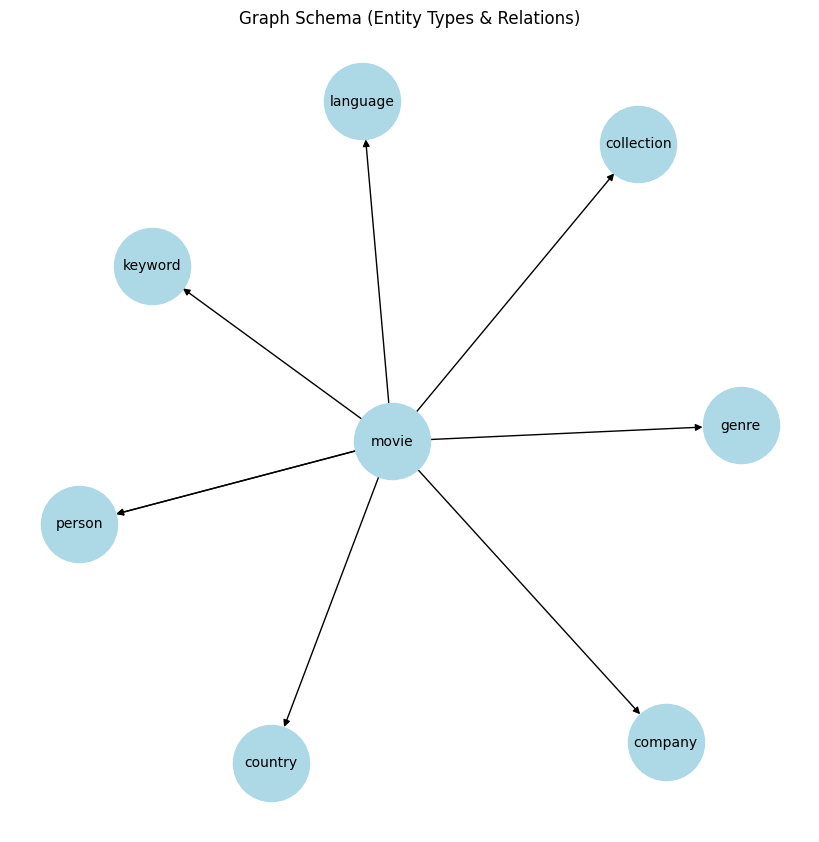

In [29]:
import matplotlib.pyplot as plt
import networkx as nx

nx_g = g.metagraph()
plt.figure(figsize=(8, 8))
nx.draw(nx_g, with_labels=True, node_color="lightblue", node_size=3000, font_size=10)
plt.title("Graph Schema (Entity Types & Relations)")
plt.show()


In [39]:
import random, dgl, torch, networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# ---- 1) sample a small ego-subgraph around one movie ----
seed_movie = random.choice(g.nodes("movie").tolist())
subg = dgl.sampling.sample_neighbors(g, {"movie": [seed_movie]}, fanout=5).to("cpu")

for etype in subg.canonical_etypes:
    print(etype, subg.num_edges(etype))
print("total nodes:", sum(subg.num_nodes(t) for t in subg.ntypes))

# (optional) limit to a couple of relations to keep it readable
# subg = dgl.edge_type_subgraph(subg, [("movie","has_cast","person"),
#                                      ("movie","has_genre","genre")])

# ---- 2) manually build a NetworkX MultiDiGraph from the hetero subgraph ----
nx_sub = nx.MultiDiGraph()

# add nodes with a composite id to avoid cross-type id collisions
for ntype in subg.ntypes:
    for nid in subg.nodes(ntype).tolist():
        nx_sub.add_node((ntype, int(nid)), ntype=ntype)

# add typed edges
for (srctype, etype, dsttype) in subg.canonical_etypes:
    u, v = subg.edges(etype=(srctype, etype, dsttype))
    u = u.tolist(); v = v.tolist()
    for ui, vi in zip(u, v):
        nx_sub.add_edge((srctype, int(ui)), (dsttype, int(vi)),
                        etype=etype, srctype=srctype, dsttype=dsttype)

# ---- 3) color nodes by node type, label the seed movie ----
palette = list(mcolors.TABLEAU_COLORS.values())
type_list = subg.ntypes
color_map = {t: palette[i % len(palette)] for i, t in enumerate(type_list)}
node_colors = [color_map[n[0]] for n in nx_sub.nodes]

plt.figure(figsize=(11, 9))
pos = nx.spring_layout(nx_sub, k=0.35, iterations=2)  # tweak spread

nx.draw(
    nx_sub, pos,
    node_color=node_colors, node_size=45,
    edge_color="#999", width=0.6, with_labels=False
)

# highlight the seed movie
if ("movie", int(seed_movie)) in nx_sub.nodes:
    nx.draw_networkx_nodes(
        nx_sub, pos,
        nodelist=[("movie", int(seed_movie))],
        node_color="#FF5733", node_size=140, linewidths=1.0, edgecolors="black"
    )

plt.title(f'1-hop neighborhood around movie node {int(seed_movie)}')
plt.axis("off")
plt.show()


('movie', 'belongs_to_collection', 'collection') 0
('movie', 'has_cast', 'person') 0
('movie', 'has_crew', 'person') 0
('movie', 'has_genre', 'genre') 0
('movie', 'has_keyword', 'keyword') 0
('movie', 'in_language', 'language') 0
('movie', 'made_in', 'country') 0
('movie', 'produced_by', 'company') 0
total nodes: 169866


KeyboardInterrupt: 

<Figure size 1100x900 with 0 Axes>